In [ ]:
import pandas as pd

df = pd.read_excel('rekap_pasien.xlsx')

# Tampilkan DATA
df

,USIA,JK,RIKEL,SISTOLIK,DIASTOLIK,BB,MEROKOK,HIPERTENSI
0,67 TAHUN,PEREMPUAN,TIDAK,100,160,60,TIDAK,Hipertensi Tingkat 2
1,49 TAHUN,PEREMPUAN,YA,180,102,50,TIDAK,Hipertensi Tingkat 2
2,37 TAHUN,PEREMPUAN,YA,220,100,60,TIDAK,Hipertensi Tingkat 2
3,73 TAHUN,PEREMPUAN,TIDAK,138,82,65,TIDAK,Pra-hipertensi
4,58 TAHUN,LAKI-LAKI,YA,180,90,45,YA,Hipertensi Tingkat 1
...,...,...,...,...,...,...,...,...
969,56 TAHUN,PEREMPUAN,TIDAK,132,79,66,TIDAK,Pra-hipertensi
970,48 TAHUN,PEREMPUAN,TIDAK,132,79,80,TIDAK,Pra-hipertensi
971,64 TAHUN,LAKI-LAKI,YA,151,85,52,TIDAK,Pra-hipertensi
972,73 TAHUN,PEREMPUAN,TIDAK,120,60,87,TIDAK,Pra-hipertensi


In [ ]:
#data cleaning (memeriksa apakah ada data yang missing) (menghitung jumlah data yang missing) (tidak ada data yang hilang atau kosong, jadi tidak dilakukan data cleaning)
df.isna().sum()

USIA          0
JK            0
RIKEL         0
SISTOLIK      0
DIASTOLIK     0
BB            0
MEROKOK       0
HIPERTENSI    0
dtype: int64

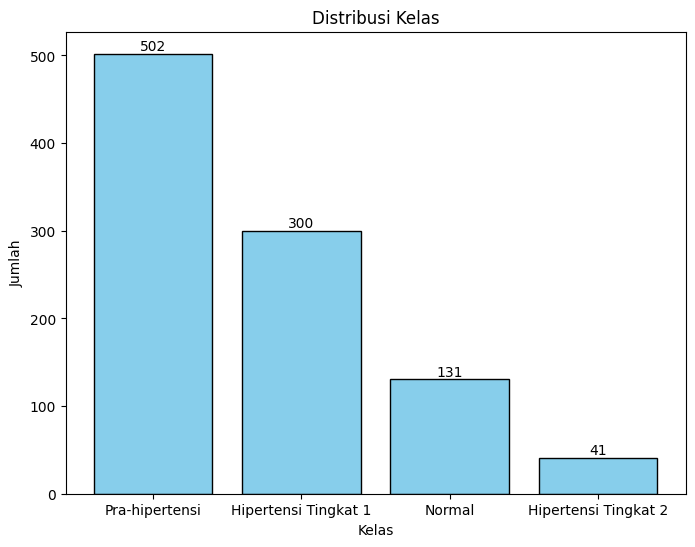

In [ ]:
#PLOT DISTRIBUSI DATA

import matplotlib.pyplot as plt

# Hitung frekuensi setiap kategori
kelas_counts = df['HIPERTENSI'].value_counts()

# Buat grafik batang
plt.figure(figsize=(8, 6))
bars = plt.bar(kelas_counts.index, kelas_counts.values, color='skyblue', edgecolor='black')

# Menambahkan nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Menambahkan label dan judul
plt.title('Distribusi Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)  # Menjaga label sumbu x tetap horizontal

# Menampilkan plot
plt.show()

# TRANSFORMASI

In [ ]:
# Set option to opt-in to future behavior
pd.set_option('future.no_silent_downcasting', True)

# Membuat dataframe baru dengan transformasi yang diinginkan
df_transformed = df.copy()
df_transformed['JK'] = df_transformed['JK'].replace({'LAKI-LAKI': 1, 'PEREMPUAN': 0}).astype(int)
df_transformed['RIKEL'] = df_transformed['RIKEL'].replace({'YA': 1, 'TIDAK': 0}).astype(int)
df_transformed['MEROKOK'] = df_transformed['MEROKOK'].replace({'YA': 1, 'TIDAK': 0}).astype(int)
df_transformed['HIPERTENSI'] = df_transformed['HIPERTENSI'].replace({
    'Hipertensi Tingkat 2': 3,
    'Hipertensi Tingkat 1': 2,
    'Pra-hipertensi': 1,
    'Normal': 0
}).astype(int)

# Menampilkan hasil dataframe baru
df_transformed

,USIA,JK,RIKEL,SISTOLIK,DIASTOLIK,BB,MEROKOK,HIPERTENSI
0,67 TAHUN,0,0,100,160,60,0,3
1,49 TAHUN,0,1,180,102,50,0,3
2,37 TAHUN,0,1,220,100,60,0,3
3,73 TAHUN,0,0,138,82,65,0,1
4,58 TAHUN,1,1,180,90,45,1,2
...,...,...,...,...,...,...,...,...
969,56 TAHUN,0,0,132,79,66,0,1
970,48 TAHUN,0,0,132,79,80,0,1
971,64 TAHUN,1,1,151,85,52,0,1
972,73 TAHUN,0,0,120,60,87,0,1


# NORMALISASI

In [ ]:
# MENGHAPUS SATUAN TAHUN AGAR KOLOM USIA BERISI ANGKA AGAR BISA DIOLAH UNTUK PROSES NORMALISASI
df_transformed['USIA'] = df_transformed['USIA'].str.replace(' TAHUN', '', regex=False).astype(int)

df_transformed

,USIA,JK,RIKEL,SISTOLIK,DIASTOLIK,BB,MEROKOK,HIPERTENSI
0,67,0,0,100,160,60,0,3
1,49,0,1,180,102,50,0,3
2,37,0,1,220,100,60,0,3
3,73,0,0,138,82,65,0,1
4,58,1,1,180,90,45,1,2
...,...,...,...,...,...,...,...,...
969,56,0,0,132,79,66,0,1
970,48,0,0,132,79,80,0,1
971,64,1,1,151,85,52,0,1
972,73,0,0,120,60,87,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan scaler hanya pada kolom USIA, TEKANAN DARAH SISTOLIK, TEKANAN DARAH DIASTOLIK, dan BB
df_transformed[['USIA', 'SISTOLIK', 'DIASTOLIK', 'BB']] = scaler.fit_transform(df_transformed[['USIA', 'SISTOLIK', 'DIASTOLIK', 'BB']])

df_transformed

,USIA,JK,RIKEL,SISTOLIK,DIASTOLIK,BB,MEROKOK,HIPERTENSI
0,0.680851,0,0,0.142857,1.000000,0.454545,0,3
1,0.489362,0,1,0.714286,0.495652,0.272727,0,3
2,0.361702,0,1,1.000000,0.478261,0.454545,0,3
3,0.744681,0,0,0.414286,0.321739,0.545455,0,1
4,0.585106,1,1,0.714286,0.391304,0.181818,1,2
...,...,...,...,...,...,...,...,...
969,0.563830,0,0,0.371429,0.295652,0.563636,0,1
970,0.478723,0,0,0.371429,0.295652,0.818182,0,1
971,0.648936,1,1,0.507143,0.347826,0.309091,0,1
972,0.744681,0,0,0.285714,0.130435,0.945455,0,1


# PEMBAGIAN DATA

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical

X = df_transformed.drop(columns=['HIPERTENSI']) #HIPERTENSI DIHAPUS, JADI YG TADINYA ADA 7 ATRIBUT JADI 6 ATRIBUT
y = df_transformed[['HIPERTENSI']] #HIPERTENSI DIJADIKAN SEBAGAI KELAS

# Bagi data menjadi set pelatihan dan set pengujian (80% latih : 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)

print("Data Pelatihan:")
print(X_train.shape, y_train.shape)
print("\nData Pengujian:")
print(X_test.shape, y_test.shape)



Data Pelatihan:
(779, 7) (779, 4)

Data Pengujian:
(195, 7) (195, 1)


# PEMODELAN BPNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Definisikan fungsi loss RMSE
def rmse_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Inisialisasi model
model = Sequential()

# Tambahkan layer Input
model.add(Input(shape=(7,)))  # Input layer dengan 7 fitur

# Layer hidden pertama dengan 8 neuron
model.add(Dense(8, activation='relu'))

# Layer hidden kedua dengan 8 neuron
model.add(Dense(8, activation='relu'))

# Layer output dengan 4 neuron (untuk klasifikasi 4 kelas) dan fungsi aktivasi softmax
model.add(Dense(4, activation='softmax')) #lebih dari 0,5 dibulat jadi 1 (softmax)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.1),
              loss=rmse_loss,  # Menggunakan fungsi loss kustom RMSE
              metrics=['accuracy'])  # Jika ingin menghitung RMSE selama pelatihan

# Ringkasan model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172 (688.00 B)

 Trainable params: 172 (688.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import callbacks

modelPath = "modelku.keras"
# Checkpoint
checkpoint = callbacks.ModelCheckpoint(modelPath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only = True,
                                verbose = 1)
callbackList=[checkpoint]

In [ ]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USIA        974 non-null    float64
 1   JK          974 non-null    int32  
 2   RIKEL       974 non-null    int32  
 3   SISTOLIK    974 non-null    float64
 4   DIASTOLIK   974 non-null    float64
 5   BB          974 non-null    float64
 6   MEROKOK     974 non-null    int32  
 7   HIPERTENSI  974 non-null    int32  
dtypes: float64(4), int32(4)
memory usage: 45.8 KB


In [ ]:
# Melatih model
modelHistory = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, callbacks=callbackList)

Epoch 1/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.0000e+00 - loss: 0.4650
Epoch 1: val_accuracy improved from -inf to 0.46795, saving model to modelku.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4483 - loss: 0.4087 - val_accuracy: 0.4679 - val_loss: 0.4069
Epoch 2/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5312 - loss: 0.3931
Epoch 2: val_accuracy did not improve from 0.46795
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5434 - loss: 0.3877 - val_accuracy: 0.4679 - val_loss: 0.4028
Epoch 3/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5625 - loss: 0.3853
Epoch 3: val_accuracy did not improve from 0.46795
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5296 - loss: 0.3895 - val_accuracy: 0.4679 - val_loss: 0.4077
Epoch 4/500
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5938 - loss: 0.3835
Epoch 4: val_accuracy did not improve from 0.46795
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5599 - loss: 0.382

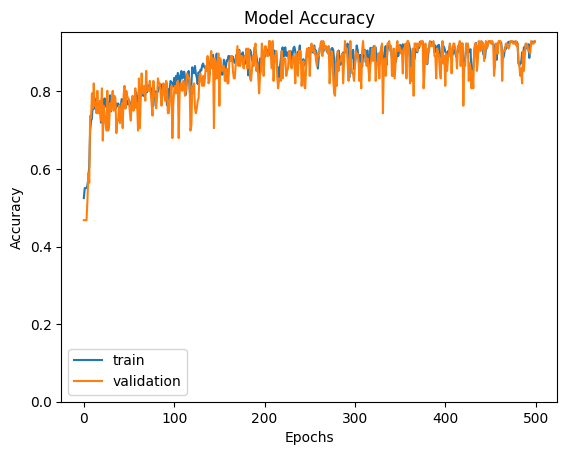

In [ ]:
# History of accuracy
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Model {}'.format('Accuracy'))
plt.ylim(0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

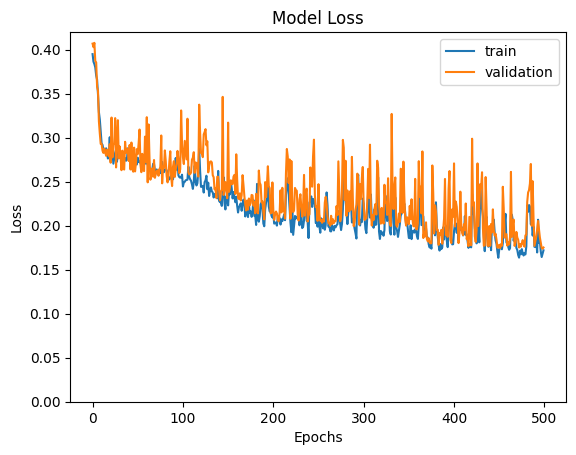

In [ ]:
# History of Loss
plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Model {}'.format('Loss'))
plt.ylim(0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
best_history = modelHistory.history['val_accuracy']
best_epoch = best_history.index(max(best_history))
best_val_accuracy = best_history[best_epoch]
training_accuracy = modelHistory.history['accuracy'][best_epoch]
training_loss = modelHistory.history['loss'][best_epoch]
val_loss = modelHistory.history['val_loss'][best_epoch]

print(f'Validation Accuracy Tertinggi: {best_val_accuracy}')
print(f'Training Accuracy : {training_accuracy}')
print(f'Epoch Nilai Accuracy Tertinggi : {best_epoch}')
print(f'Validation Loss: {val_loss}')

Validation Accuracy Tertinggi: 0.9294871687889099
Training Accuracy : 0.898876428604126
Epoch Nilai Accuracy Tertinggi : 205
Validation Loss: 0.2063463181257248


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


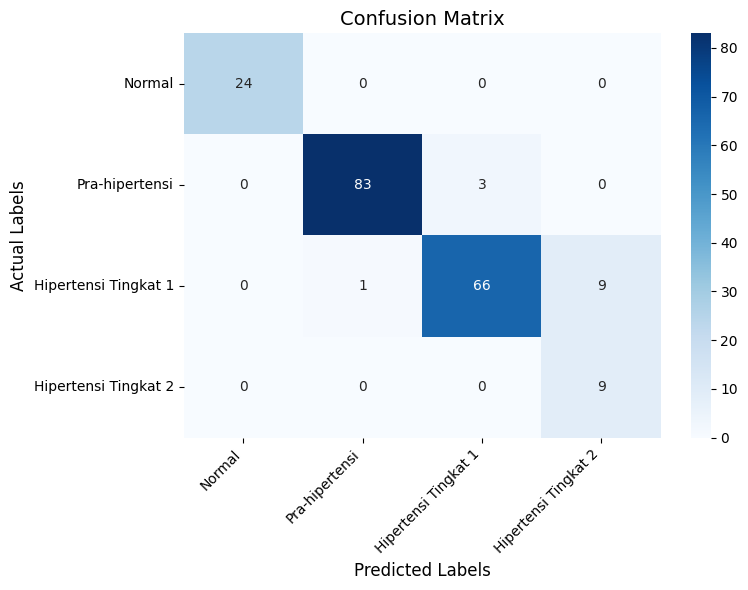

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Mengonversi prediksi ke label kelas (untuk kasus multi-kelas)
y_pred_classes = np.argmax(y_pred, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualisasi confusion matrix dengan seaborn heatmap
plt.figure(figsize=(8, 6))  # Menyesuaikan ukuran plot agar lebih rapi
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Normal', 'Pra-hipertensi', 'Hipertensi Tingkat 1', 'Hipertensi Tingkat 2'],
            yticklabels=['Normal', 'Pra-hipertensi', 'Hipertensi Tingkat 1', 'Hipertensi Tingkat 2'])

# Menambahkan label pada heatmap
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Memiringkan label X agar lebih rapi
plt.yticks(rotation=0)  # Label Y tetap horizontal
plt.tight_layout()  # Menyesuaikan tata letak agar tidak terpotong
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, np.argmax(y_pred, axis=1),digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        24
           1     0.9881    0.9651    0.9765        86
           2     0.9565    0.8684    0.9103        76
           3     0.5000    1.0000    0.6667         9

    accuracy                         0.9333       195
   macro avg     0.8612    0.9584    0.8884       195
weighted avg     0.9547    0.9333    0.9393       195

